In [1]:
import pandas as pd
import glob
from tqdm.notebook import tqdm

In [162]:
pd.set_option('display.max_columns', 50)

In [6]:
pathes = glob.glob("E:/full_data/*0000.pkl")

In [27]:
train_pathes = pathes[:-2]

In [10]:
test_pathes = pathes[-2:]

In [29]:
train_df = pd.DataFrame()
for path in tqdm(train_pathes):
    temp_df = pd.DataFrame(pd.read_pickle(path))
    train_df = pd.concat([train_df, temp_df], ignore_index=True, sort="atdate")

In [17]:
test_df = pd.DataFrame()
for path in tqdm(test_pathes):
    temp_df = pd.DataFrame(pd.read_pickle(path))
    test_df = pd.concat([test_df, temp_df], ignore_index=True, sort="atdate")

In [195]:
idx

3761976

In [198]:
idx = 3761976
length = 0

In [205]:
list(train_df['detailResult'][idx][0][length].keys())[0]

'31'

In [207]:
len(train_df['detailResult'][idx][0])

2

In [215]:
detail_result_mapping_table = {}
idx_detail_result = {}
all_re = set()
for idx in tqdm(train_df.index):
    temp = []
    try:
        for cnt in range(len(train_df['detailResult'][idx][0])):
            val = list(train_df['detailResult'][idx][0][cnt].keys())[0]
            all_re = all_re | set(val)
            temp.append(val)
    except:
        temp.append("Nan")
    idx_detail_result[idx] = temp
    

In [216]:
all_re

{'0', '1', '2', '3', '4', '5', '6', '7', '9'}

In [235]:
idx_detail_result[986][0]

'31'

In [228]:
all_re_list = list(all_re)

In [246]:
all_re_list

['91',
 '42',
 '31',
 '43',
 '101',
 '71',
 '12',
 '11',
 '13',
 '52',
 '72',
 '161',
 '14',
 '53',
 '51',
 '93',
 '34',
 '122',
 '151',
 '92',
 '141',
 '41',
 '33']

In [250]:
one_hot = {}
for_df = {}
for key in all_re_list:
    for_df[key] = []



for idx in tqdm(list(idx_detail_result.keys())):
    temp = {}
    
    for re_keys in all_re_list:
        if re_keys in idx_detail_result[idx]:
            temp[re_keys] = 1
            for_df[re_keys].append(1)
        else:
            temp[re_keys] = 0
            for_df[re_keys].append(0)

    one_hot[idx] = temp

In [253]:
detail_res_one_hot = pd.DataFrame(for_df)

In [326]:
detail_res_one_hot

,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723315,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723316,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723317,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723318,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
detail_res_one_hot = plus_detail_one_hot[all_re_list]

In [328]:
detail_res_one_hot

,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761972,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3761973,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3761974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3761975,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [258]:
one_hot

{0: {'91': 0,
  '42': 0,
  '31': 0,
  '43': 0,
  '101': 0,
  '71': 0,
  '12': 0,
  '11': 0,
  '13': 0,
  '52': 0,
  '72': 0,
  '161': 0,
  '14': 0,
  '53': 0,
  '51': 0,
  '93': 0,
  '34': 0,
  '122': 0,
  '151': 0,
  '92': 0,
  '141': 0,
  '41': 0,
  '33': 1},
 1: {'91': 0,
  '42': 0,
  '31': 0,
  '43': 0,
  '101': 0,
  '71': 0,
  '12': 0,
  '11': 0,
  '13': 0,
  '52': 0,
  '72': 0,
  '161': 0,
  '14': 0,
  '53': 0,
  '51': 0,
  '93': 0,
  '34': 0,
  '122': 0,
  '151': 0,
  '92': 0,
  '141': 0,
  '41': 0,
  '33': 1},
 2: {'91': 0,
  '42': 0,
  '31': 0,
  '43': 0,
  '101': 0,
  '71': 0,
  '12': 0,
  '11': 0,
  '13': 0,
  '52': 0,
  '72': 0,
  '161': 0,
  '14': 0,
  '53': 0,
  '51': 0,
  '93': 0,
  '34': 0,
  '122': 0,
  '151': 0,
  '92': 0,
  '141': 0,
  '41': 0,
  '33': 1},
 3: {'91': 0,
  '42': 0,
  '31': 0,
  '43': 0,
  '101': 0,
  '71': 0,
  '12': 0,
  '11': 0,
  '13': 0,
  '52': 0,
  '72': 0,
  '161': 0,
  '14': 0,
  '53': 0,
  '51': 0,
  '93': 0,
  '34': 0,
  '122': 0,
  '151': 0

In [244]:
len(all_re_list)

23

In [245]:
all_re_list

['91',
 '42',
 '31',
 '43',
 '101',
 '71',
 '12',
 '11',
 '13',
 '52',
 '72',
 '161',
 '14',
 '53',
 '51',
 '93',
 '34',
 '122',
 '151',
 '92',
 '141',
 '41',
 '33']

In [242]:
all_re_list.index('91')

0

In [243]:
all_re_list[0]

'91'

In [261]:
detail_res_one_hot

,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761972,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3761973,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3761974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3761975,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# detailResult_one_hot

In [262]:
plus_detail_one_hot = pd.merge(train_feature_15, detail_res_one_hot, left_index=True, right_index=True, how='outer')

In [265]:
del plus_detail_one_hot["detailResult"]

In [266]:
plus_detail_one_hot

,autoFlag,jumboPayloadFlag,destinationIP,metaType,destinationPort,orgIDX,packetSize,detectName,protocol,directionType,sourceIP,eventCount,sourcePort,eventType,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0.0,0.0,-1879557639,-1,56812,61,24000,268286000218783319154794448627375314308,6,1,-872670256,1,443,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,-751230265,-1,50434,59,24000,293578124710487896367244340316248460786,6,0,1025900107,1,443,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,-2114037978,-1,12296,67,28062,268286000218783319154794448627375314308,6,0,2010071577,1,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,169083437,-1,53364,42,24000,268286000218783319154794448627375314308,6,0,762392823,1,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,-576972514,-1,37219,43,26400,268286000218783319154794448627375314308,6,0,584070644,1,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761972,0.0,0.0,-1932657660,-1,80,17,1398,97586995473211068025452202900168239849,6,1,-1585818781,1,58839,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3761973,0.0,1.0,31912023,-1,7105,2,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3761974,0.0,0.0,-634318333,-1,6295,51,48000,293578124710487896367244340316248460786,6,0,2042439690,1,80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3761975,0.0,1.0,-1053501310,-1,4326,2,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [263]:
forest2 = RandomForestClassifier()

In [268]:
forest2.fit(plus_detail_one_hot, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [271]:
test_idx_detail_result = {}
test_all_re = set()
for idx in tqdm(test_df.index):
    temp = []
    flag = False
    try:
        for cnt in range(len(test_df['detailResult'][idx][0])):
            val = list(test_df['detailResult'][idx][0][cnt].keys())[0]
            test_all_re = test_all_re.union(set(val))
            temp.append(val)
        if len(test_df['detailResult'][idx][0]) == 0:
            flag = True
    except:
        pass
    if flag:
        temp.append("Nan")
    test_idx_detail_result[idx] = temp

In [273]:
test_all_re = set()
for res in tqdm(list(test_idx_detail_result.keys())):
    try:
        test_all_re = test_all_re.union(set(test_idx_detail_result[res]))
    except:
        print(res)

In [276]:
for t_re in list(test_all_re):
    if t_re not in all_re:
        print(t_re)

32


In [277]:
all_re

{'101',
 '11',
 '12',
 '122',
 '13',
 '14',
 '141',
 '151',
 '161',
 '31',
 '33',
 '34',
 '41',
 '42',
 '43',
 '51',
 '52',
 '53',
 '71',
 '72',
 '91',
 '92',
 '93'}

In [308]:
test_one_hot = {}
test_for_df = {}
for key in all_re_list:
    test_for_df[key] = []

except_list = []

for idx in tqdm(list(test_idx_detail_result.keys())):
    temp = {}
    
    if "32" in test_idx_detail_result[idx] or 32 in test_idx_detail_result[idx]:
        except_list.append(idx)
        
    for re_keys in all_re_list:
        if re_keys in test_idx_detail_result[idx]:
            temp[re_keys] = 1
            test_for_df[re_keys].append(1)
        else:
            temp[re_keys] = 0
            test_for_df[re_keys].append(0)

    test_one_hot[idx] = temp

In [309]:
except_list

[20010,
 50171,
 225092,
 377255,
 415352,
 418151,
 436474,
 436735,
 437153,
 439209,
 509276,
 530011]

In [283]:
test_detail_res_one_hot = pd.DataFrame(test_for_df)

In [284]:
test_detail_res_one_hot

,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723315,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723316,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723317,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723318,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [296]:
test_label = 2-test_df['analyResult']

In [316]:
except_list

[20010,
 50171,
 225092,
 377255,
 415352,
 418151,
 436474,
 436735,
 437153,
 439209,
 509276,
 530011]

In [320]:
droped_new_rule_set_test_data = test_detail_res_one_hot.drop(except_list)

In [321]:
droped_new_rule_set_test_data

,91,42,31,43,101,71,12,11,13,52,72,161,14,53,51,93,34,122,151,92,141,41,33
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723315,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723316,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723317,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723318,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [322]:
forest_detail_res_one_hot = RandomForestClassifier()

In [333]:
forest_detail_res_one_hot.fit(detail_res_one_hot, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [337]:
detail_predic = forest_detail_res_one_hot.predict(droped_new_rule_set_test_data)

In [338]:
# 정확도 확인
print('정확도 :', metrics.accuracy_score(except_test_label, detail_predic))

정확도 : 0.989615765344777


In [339]:
imp = forest_detail_res_one_hot.feature_importances_
train_cols = list(detail_res_one_hot.columns)
imp_dic = {}
for c, i in zip(train_cols, imp):
    imp_dic[c]=i
sort_imp = sorted(imp_dic.items(), key=(lambda x: x[1]), reverse=False)
imp_cols = []
imp_imp = []
for i in sort_imp:
    imp_cols.append(i[0])
    imp_imp.append(i[1])

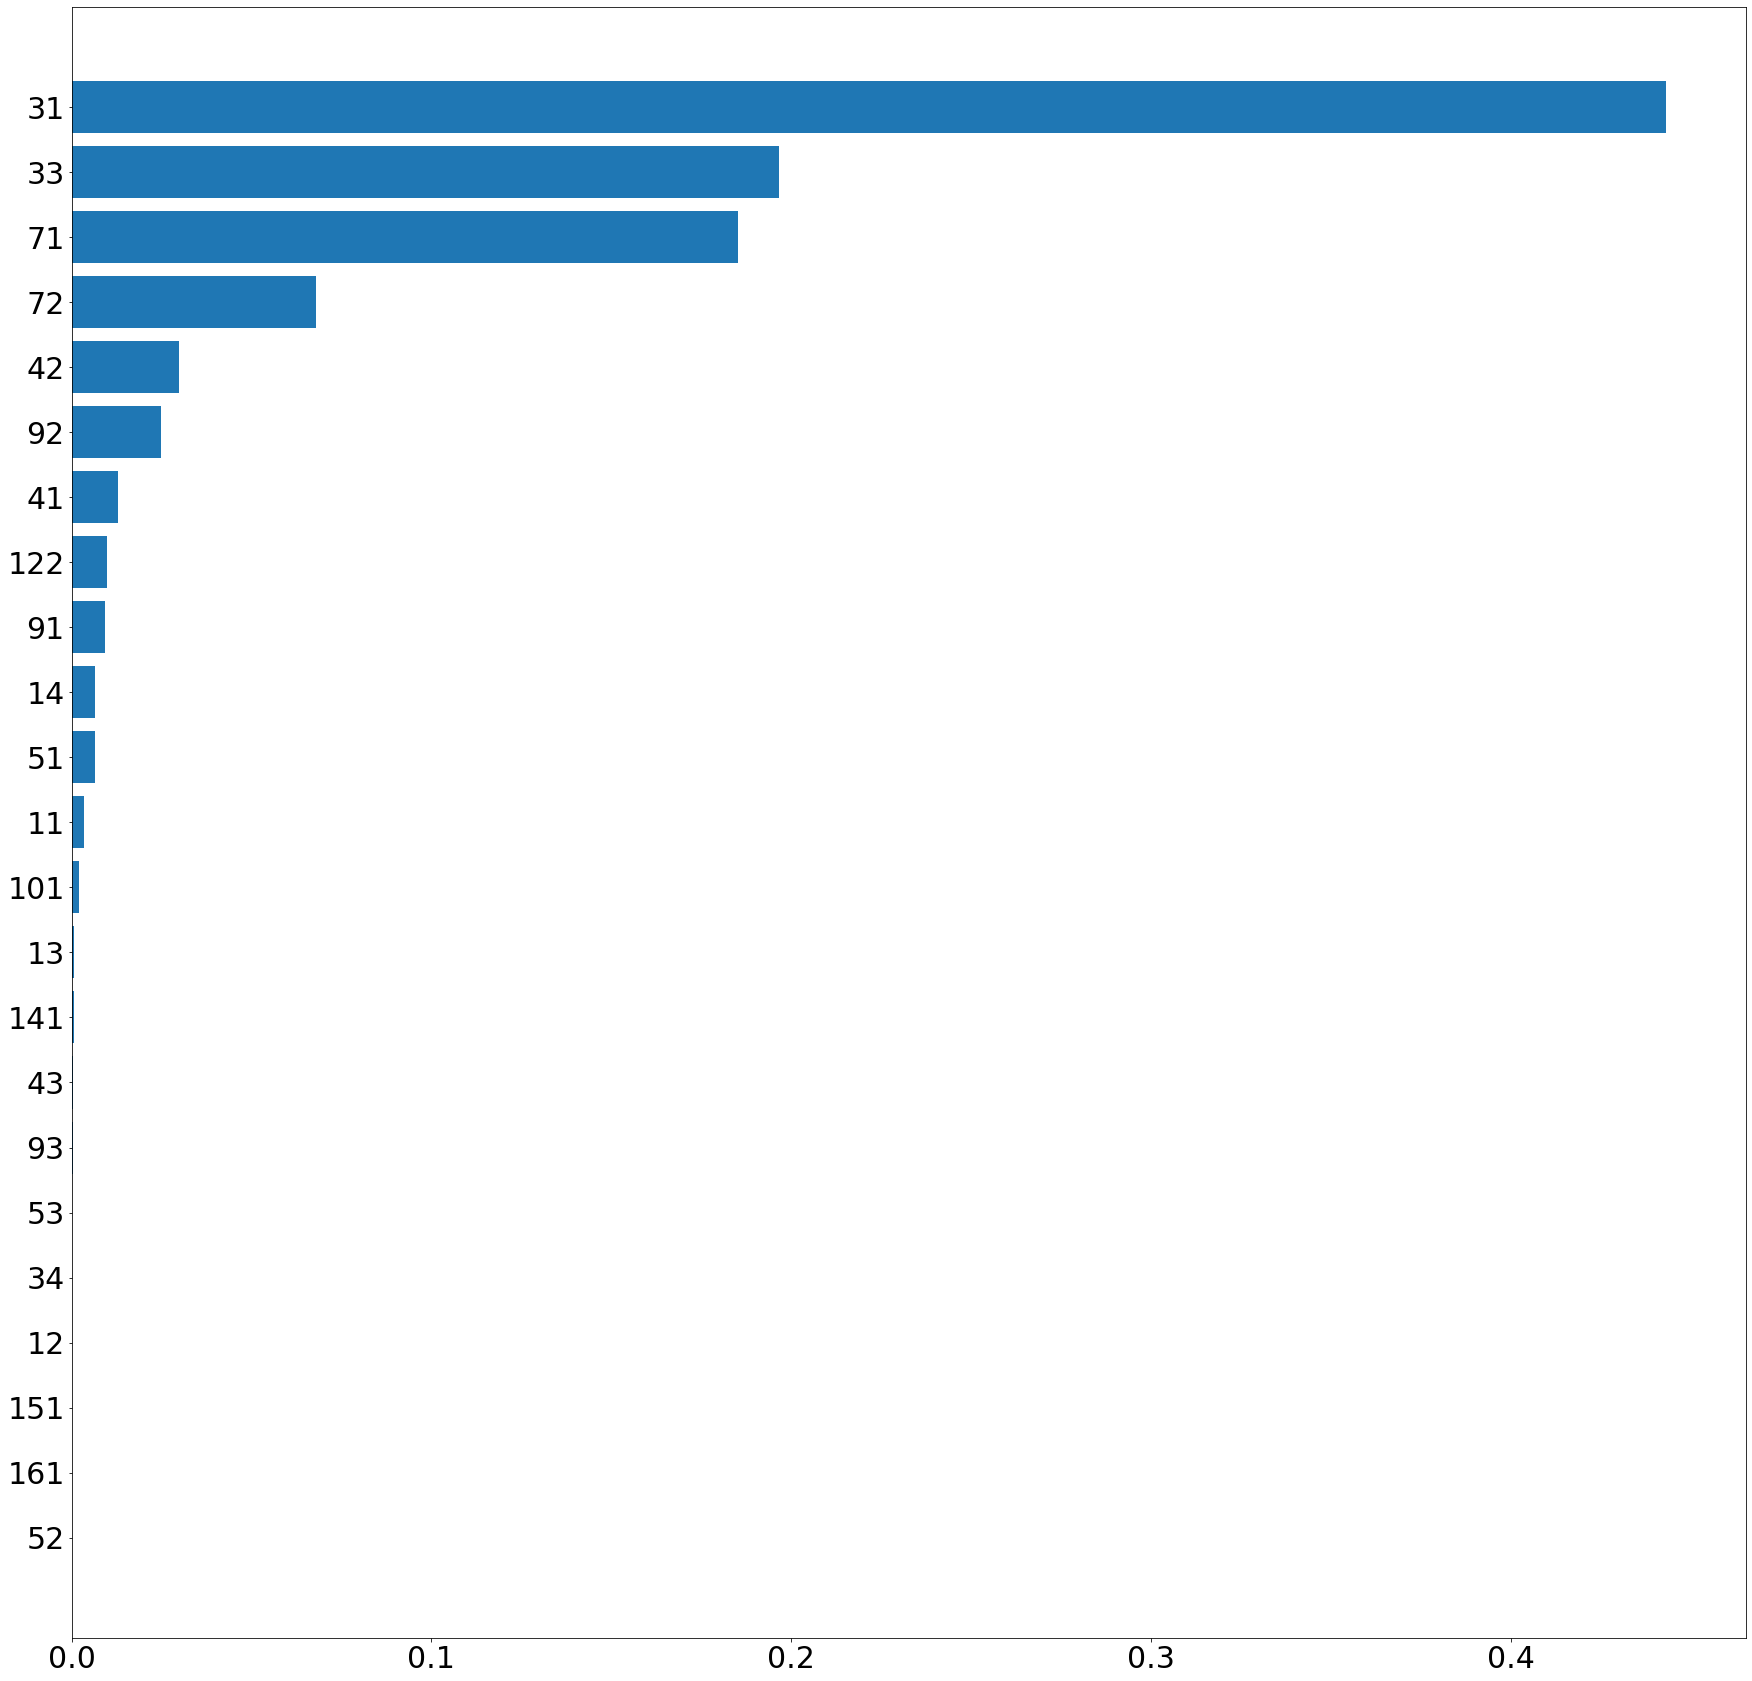

In [343]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.barh(imp_cols, imp_imp)
plt.savefig(r'E:\detain_rf.png')
plt.show()

In [330]:
train_label

0          0
1          0
2          0
3          0
4          0
          ..
3761972    0
3761973    0
3761974    0
3761975    0
3761976    0
Name: analyResult, Length: 3761977, dtype: int64

In [332]:
except_test_label = test_label.drop(except_list)

In [335]:
len(except_test_label) == len(droped_new_rule_set_test_data)

True

In [365]:
train_feature_15['metaType'].unique()

array([-1,  1], dtype=int64)

In [289]:
test_plus_detail_one_hot = pd.merge(test_feature_15, test_detail_res_one_hot, left_index=True, right_index=True, how='outer')

In [291]:
del test_plus_detail_one_hot['detailResult']

In [363]:
_plus_detail_one_hot['metaType'].unique()

array([-1,  1], dtype=int64)

In [359]:
y_pred_2 = forest2.predict(test_plus_detail_one_hot)

In [360]:
# 정확도 확인
print('정확도 :', metrics.accuracy_score(test_label, y_pred_2))

정확도 : 0.9992423823480617


In [361]:
imp = forest2.feature_importances_
train_cols = list(plus_detail_one_hot.columns)
imp_dic = {}
for c, i in zip(train_cols, imp):
    imp_dic[c]=i
sort_imp = sorted(imp_dic.items(), key=(lambda x: x[1]), reverse=False)
imp_cols = []
imp_imp = []
for i in sort_imp:
    imp_cols.append(i[0])
    imp_imp.append(i[1])

In [303]:
train_detail_result = train_feature_15['detailResult']

In [304]:
del train_feature_15['detailResult']

In [348]:
one_hot_confusion_matrix = confusion_matrix(test_label, y_pred_2)

In [349]:
one_hot_confusion_matrix

array([[653805,    129],
       [   419,  68967]], dtype=int64)

In [350]:
one_hot_pre = 653805/(653805+129)

In [352]:
one_hot_recall = 653805/(653805+419)

In [355]:
one_hot_acc = 0.9992423823480617

In [356]:
one_hot_acc, one_hot_pre, one_hot_recall

(0.9992423823480617, 0.9998027323858371, 0.9993595465773191)

In [358]:
md5_acc, md5_prec, md5_recall

(0.9989285516783719, 0.9994540733468515, 0.9993608513826558)

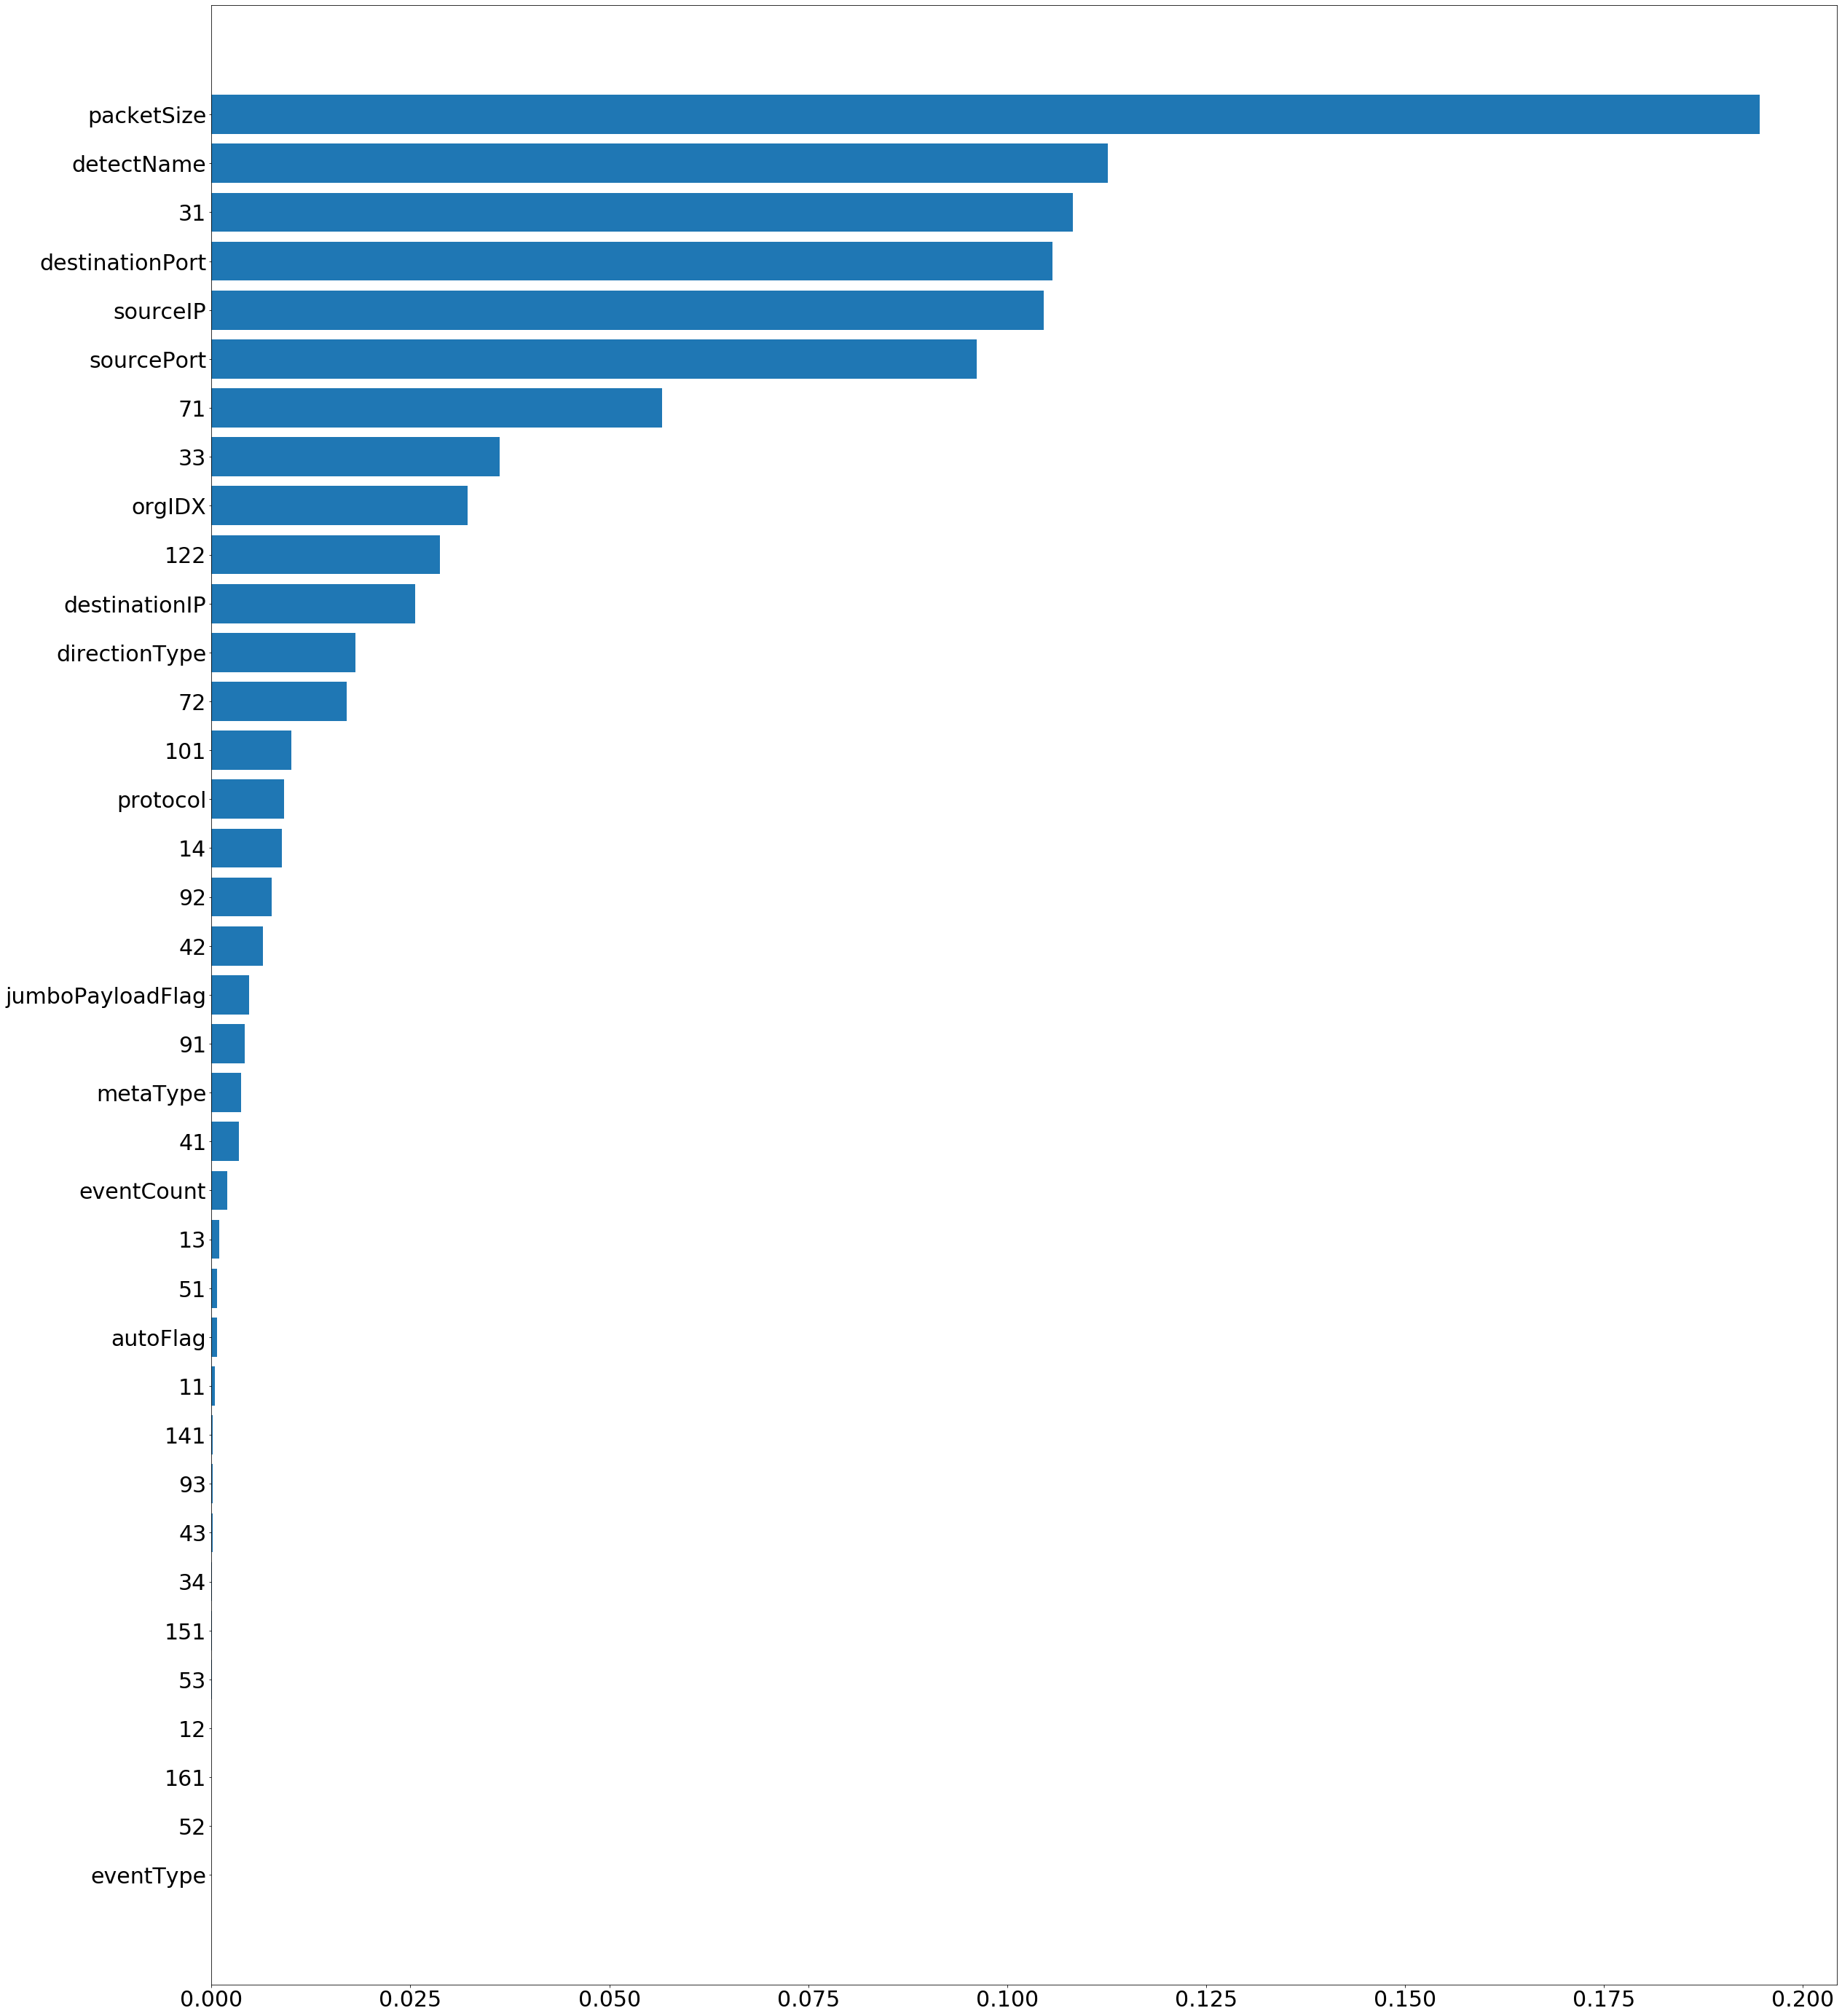

In [362]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 50))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.barh(imp_cols, imp_imp)
plt.savefig(r'E:\exp_data\old_data_rf_feature15\old_data_rf_feature_15_featureimportnace_plus_one_hot.png')
plt.show()

In [357]:
md5_acc = 0.9989285516783719

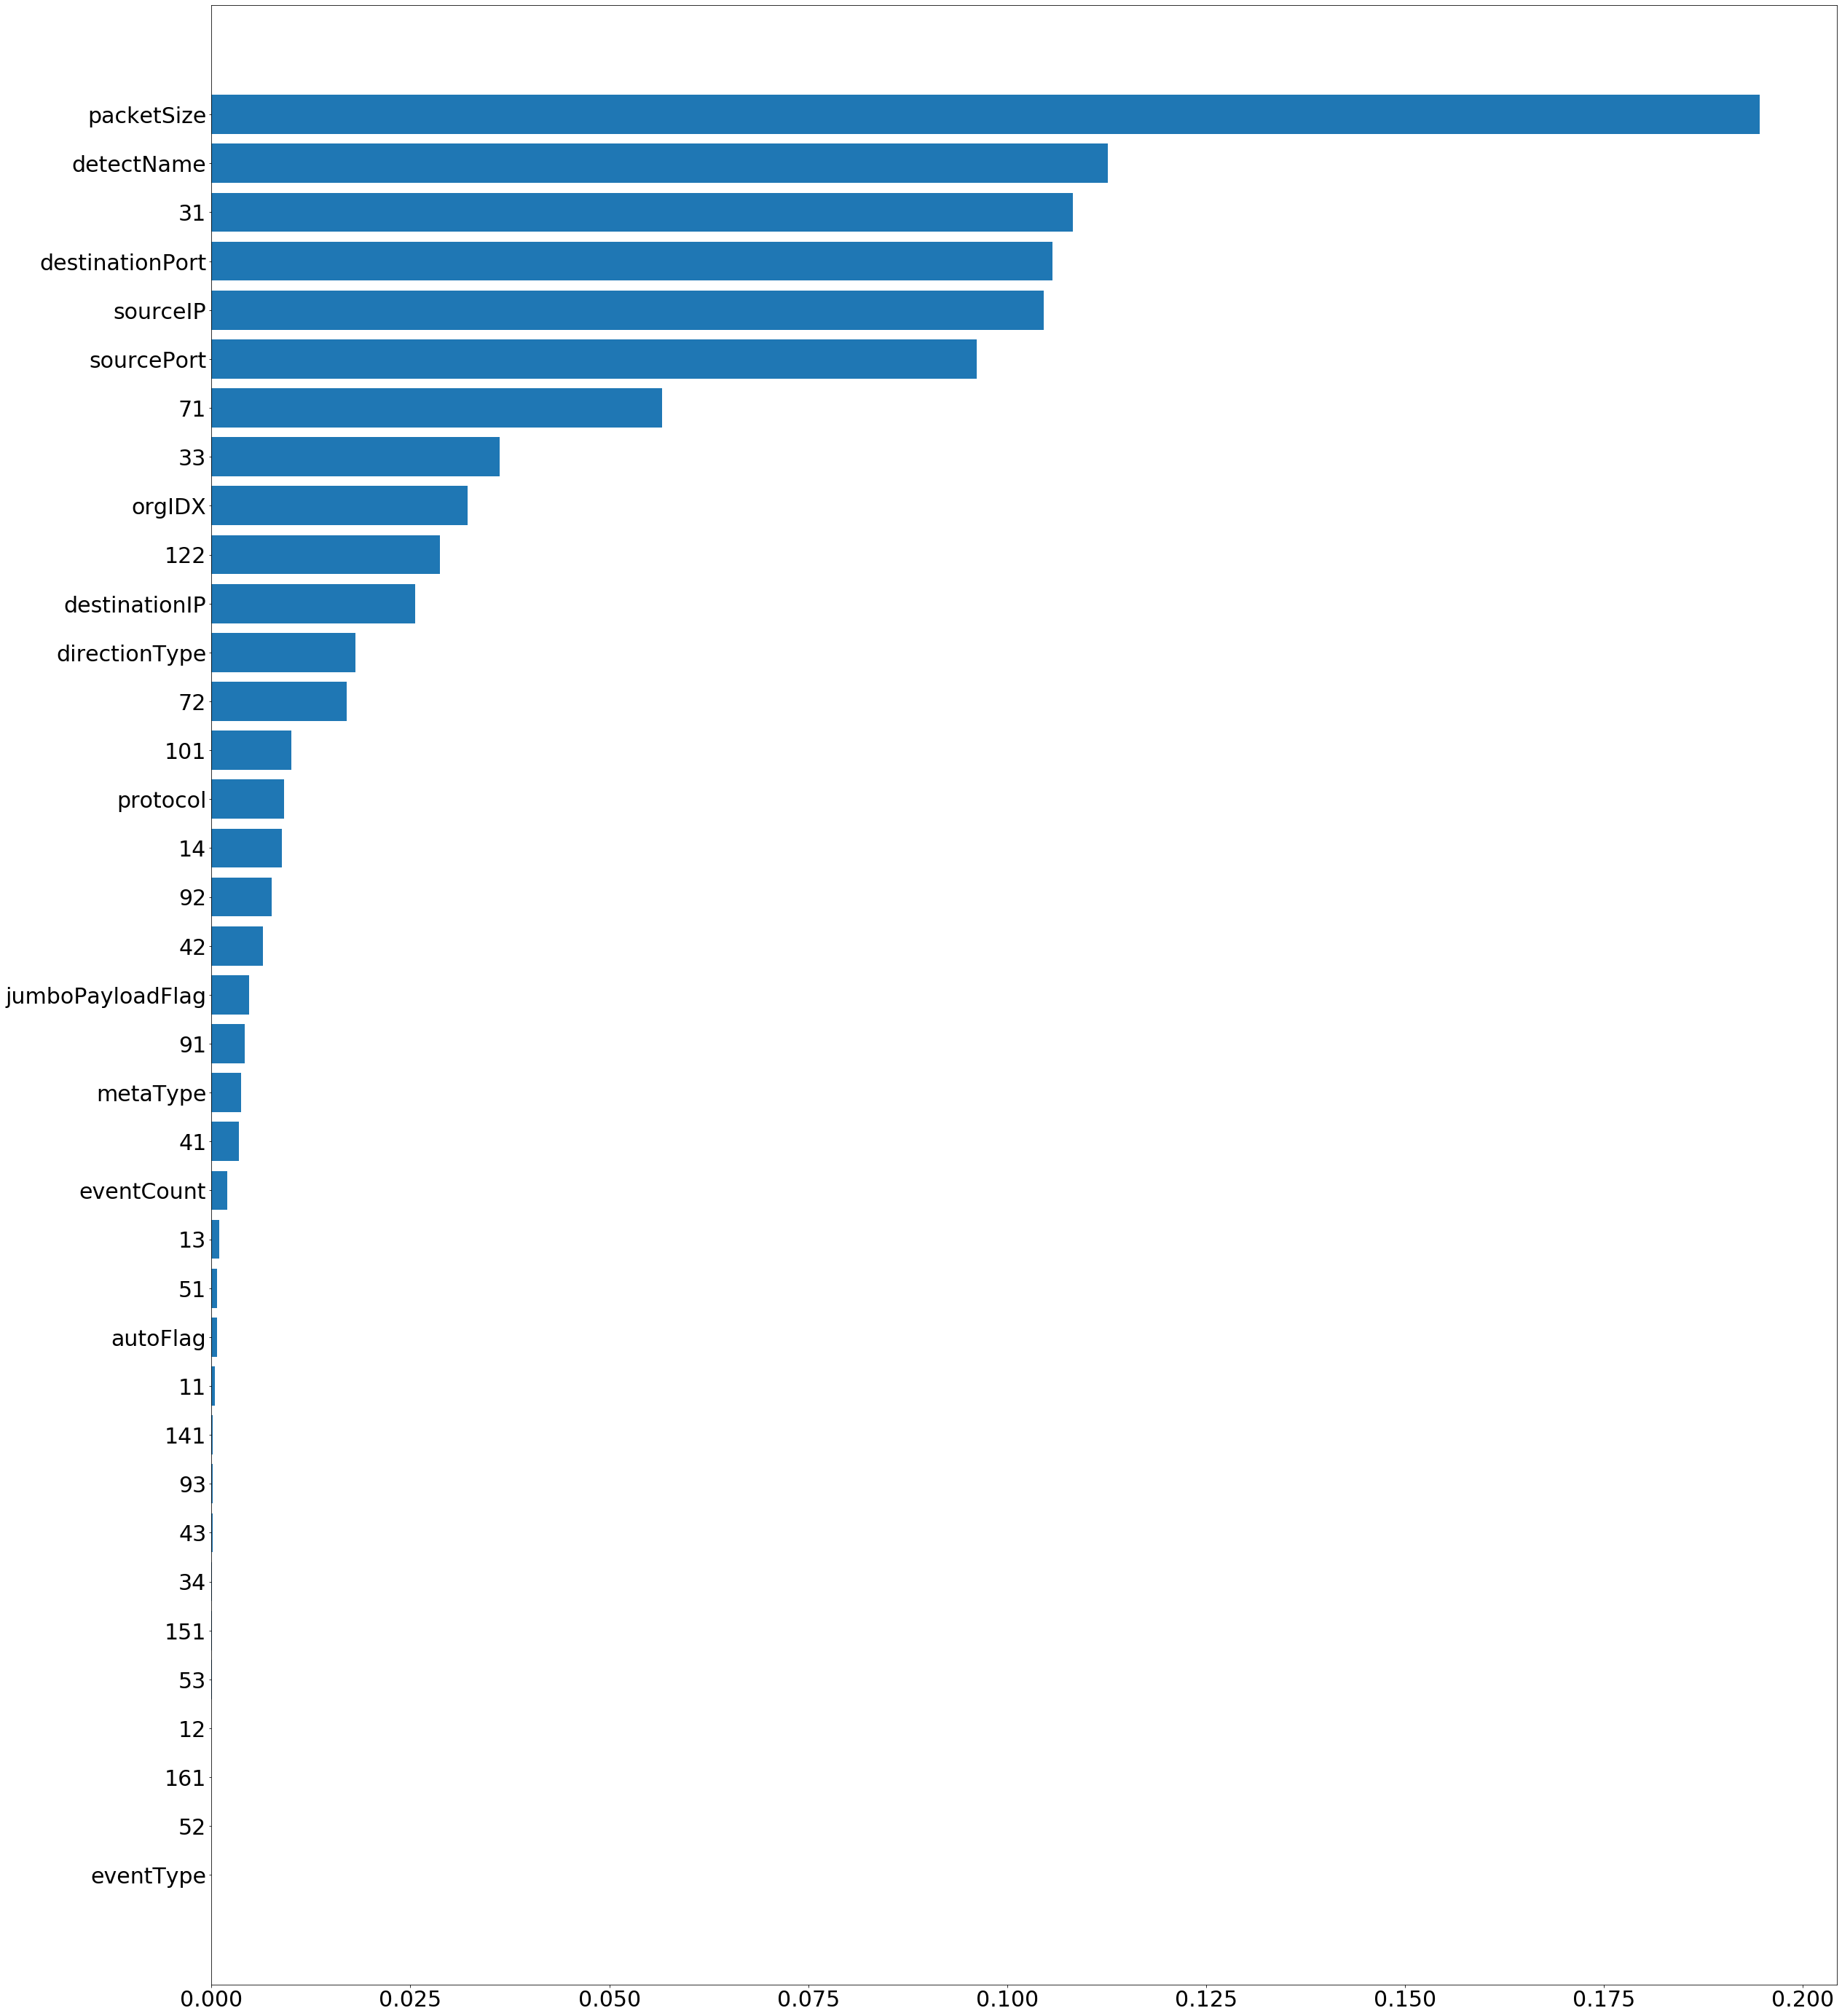

In [301]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 50))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.barh(imp_cols, imp_imp)
plt.savefig(r'E:\exp_data\old_data_rf_feature15\old_data_rf_feature_15_featureimportnace.png')
plt.show()

# test 3

In [ ]:
train_detail_result = train_feature_15['detailResult']

In [ ]:
del train_feature_15['detailResult']

In [305]:
forest3 = RandomForestClassifier()

In [307]:
forest3.fit(train_feature_15, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [372]:
test_feature_15

,autoFlag,jumboPayloadFlag,destinationIP,metaType,destinationPort,orgIDX,packetSize,detectName,protocol,directionType,sourceIP,eventCount,sourcePort,eventType
0,False,True,-627160970,-1,34640,2,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
1,False,True,-872439484,-1,34670,2,8814,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
2,False,False,-752307359,-1,38687,54,52800,268286000218783319154794448627375314308,6,0,2110909093,1,443,3
3,False,False,-752307359,-1,38756,54,52800,293578124710487896367244340316248460786,6,0,2110909093,1,443,3
4,False,True,2129254055,-1,25122,2,8514,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723315,False,True,-1270432231,-1,3406,2,10274,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
723316,False,True,-880432652,-1,50738,2,11734,11043081091823270488895609771380702317,6,1,-872753326,1,80,3
723317,False,False,1999013908,-1,80,1,1506,197944958029870436445904671982155754471,6,1,-1879516868,1,39635,3
723318,False,True,32964961,-1,49483,2,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3


In [310]:
test_detail_result = test_feature_15['detailResult']
del test_feature_15['detailResult']

In [312]:
y_pred_3 = forest3.predict(test_feature_15)

In [313]:
# 정확도 확인
print('정확도 :', metrics.accuracy_score(test_label, y_pred_3))

정확도 : 0.9982483548083836


In [367]:
len(train_feature_15)

3761977

In [314]:
imp = forest3.feature_importances_
train_cols = list(train_feature_15.columns)
imp_dic = {}
for c, i in zip(train_cols, imp):
    imp_dic[c]=i
sort_imp = sorted(imp_dic.items(), key=(lambda x: x[1]), reverse=False)
imp_cols = []
imp_imp = []
for i in sort_imp:
    imp_cols.append(i[0])
    imp_imp.append(i[1])

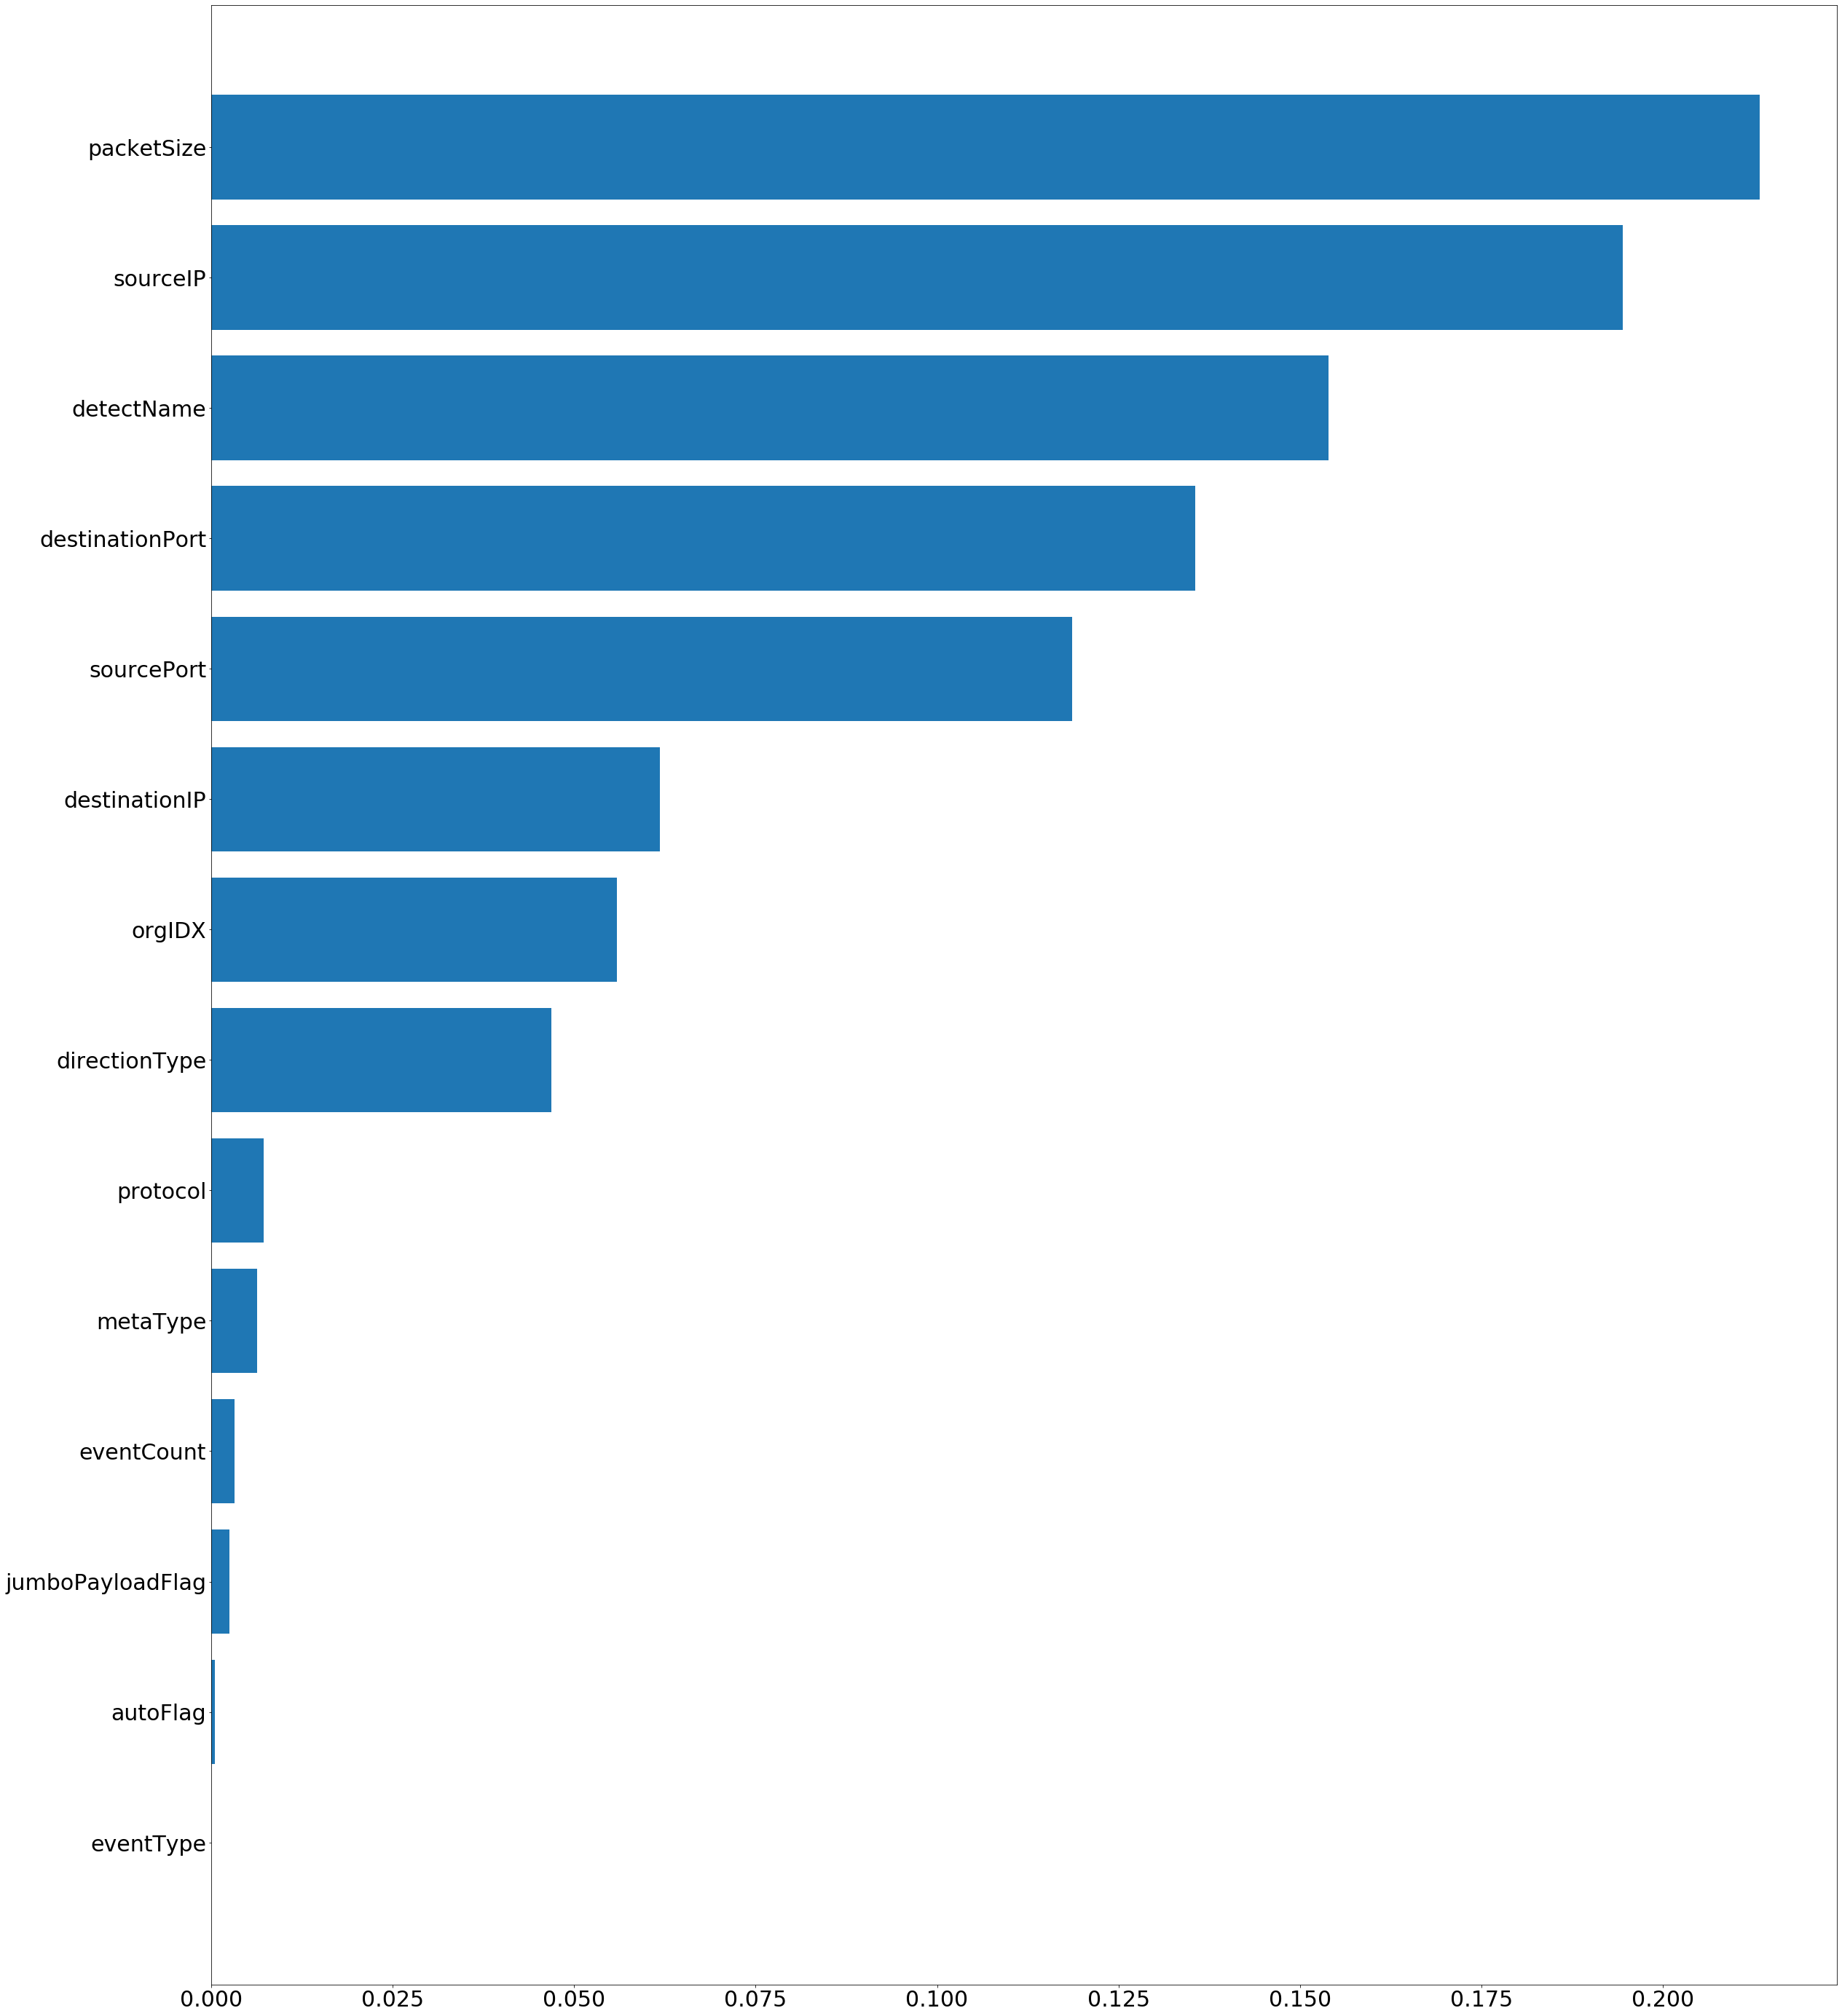

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 50))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.barh(imp_cols, imp_imp)
plt.savefig(r'E:\exp_data\old_data_rf_feature15\old_data_rf_feature_15_featureimportnace.png')
plt.show()

In [369]:
confusion_matrix(test_label, y_pred_3)

array([[653439,    495],
       [   772,  68614]], dtype=int64)

In [370]:
653439/(653439+495)

0.9992430428758866

In [371]:
653439/(653439+772)

0.9988199525841052

In [155]:
a_dict = {}
b_dict = {}
for idx in range(len(train_label)):
    if train_label[idx] == 1:
        a_dict[str(train_df['detailResult'][idx])] = a_dict.get(str(train_df['detailResult'][idx]), 0) + 1
    else:
        b_dict[str(train_df['detailResult'][idx])] = b_dict.get(str(train_df['detailResult'][idx]), 0) + 1
for key in set(a_dict.keys()) | set(b_dict.keys()):
    print(key, a_dict.get(key, 0), b_dict.get(key, 0))

[[{'14': True}]] 10 105
[[{'93': True}]] 3 0
[[{'33': True}, {'101': True}, {'122': True}]] 0 116214
[[{'31': True}, {'14': True}, {'92': True}, {'53': True}]] 0 145
[[{'31': True}, {'72': True}]] 0 34227
[[{'33': True}, {'71': True}]] 875 9236
[[{'31': True}, {'52': True}, {'52': True}]] 1 0
[[{'31': True}, {'41': True}]] 22919 0
[[{'31': True}, {'71': True}]] 1672 76348
[[{'31': True}, {'71': True}, {'92': True}]] 1405 0
[[{'31': True}, {'91': True}, {'71': True}]] 0 13515
[[{'33': True}, {'91': True}, {'71': True}]] 0 2530
[[{'12': True}, {'31': True}]] 0 4
[[{'33': True}, {'12': True}, {'43': True}]] 0 23
[[{'33': True}]] 265657 2427715
[[{'31': True}, {'42': True}, {'42': True}]] 58677 0
[[{'31': True}, {'161': True}]] 5 0
[[{'33': True}, {'151': True}]] 0 138
[[{'31': True}, {'51': True}]] 12892 0
[[{'43': True}]] 0 1
[[{'141': True}]] 292 0
[[{'14': True}, {'31': True}]] 0 297
[[]] 0 1777
[[{'31': True}, {'43': True}, {'71': True}]] 0 715
[[{'33': True}, {'53': True}, {'151': Tr

In [31]:
pd.to_pickle(train_df, "E:/exp_data/from_2018_01_to_2019_01.pkl")

In [21]:
pd.to_pickle(test_df, "E:/exp_data/from_2019_02_to_2019_03.pkl")

In [22]:
train_df.columns

Index(['_id', 'accidentProcessFlag', 'accidentType', 'analyResult', 'atdate',
       'attackType', 'autoEmailSendFlag', 'autoFlag', 'batchID',
       'decodePayload', 'destinationIP', 'destinationPort', 'detailResult',
       'detectEnd', 'detectName', 'detectStart', 'directionType', 'doubtFlag',
       'emailSendFlag', 'etcInfo', 'eventCount', 'eventType',
       'jumboPayloadFlag', 'metaType', 'orgIDX', 'packetSize', 'payload',
       'protocol', 'sourceIP', 'sourcePort', 'stdrPort', 'uid', 'vfnStatus',
       'vfnUpdate'],
      dtype='object')

In [79]:
features_15 = [
    "autoFlag", 'jumboPayloadFlag', 'destinationIP', 'metaType', 'destinationPort',
    'orgIDX', 'detailResult', 'packetSize', 'detectName', 'protocol',
    'directionType', 'sourceIP', 'eventCount', 'sourcePort', 'eventType', 'analyResult'
]

In [80]:
train_feature_15 = train_df[features_15]

In [81]:
test_feature_15 = test_df[features_15]

In [93]:
train_feature_15.head()

,autoFlag,jumboPayloadFlag,destinationIP,metaType,destinationPort,orgIDX,detailResult,packetSize,detectName,protocol,directionType,sourceIP,eventCount,sourcePort,eventType
0,0.0,0.0,-1879557639,-1,56812,61,49053479881479918017518373928069590750,24000,268286000218783319154794448627375314308,6,1,-872670256,1,443,3
1,0.0,0.0,-751230265,-1,50434,59,49053479881479918017518373928069590750,24000,293578124710487896367244340316248460786,6,0,1025900107,1,443,3
2,0.0,0.0,-2114037978,-1,12296,67,49053479881479918017518373928069590750,28062,268286000218783319154794448627375314308,6,0,2010071577,1,80,3
3,0.0,0.0,169083437,-1,53364,42,49053479881479918017518373928069590750,24000,268286000218783319154794448627375314308,6,0,762392823,1,80,3
4,0.0,0.0,-576972514,-1,37219,43,49053479881479918017518373928069590750,26400,268286000218783319154794448627375314308,6,0,584070644,1,80,3


In [83]:
train_feature_15.replace(False, 0, inplace=True)

C:\Users\seclab\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [84]:
from hashlib import md5

def conv_md5(x):
    x = x.encode()
    enc = md5(x)
    enc.update(x)
    return enc.hexdigest()

In [85]:
def hex_to_int(x):
    return int(x, 16)

In [86]:
train_feature_15['detailResult'] = train_feature_15['detailResult'].apply(str).apply(conv_md5)

train_feature_15['detailResult'] = train_feature_15['detailResult'].apply(hex_to_int)

train_feature_15['detectName'] = train_feature_15['detectName'].apply(str).apply(conv_md5).apply(hex_to_int)

C:\Users\seclab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\seclab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\seclab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [87]:
test_feature_15['detailResult'] = test_feature_15['detailResult'].apply(str).apply(conv_md5).apply(hex_to_int)
test_feature_15['detectName'] = test_feature_15['detectName'].apply(str).apply(conv_md5).apply(hex_to_int)

C:\Users\seclab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\seclab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
train_label = 2-train_feature_15['analyResult']
test_label = 2-test_feature_15['analyResult']

In [92]:
del train_feature_15['analyResult']
del test_feature_15['analyResult']

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)

In [97]:
forest.fit(train_feature_15, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# test

In [98]:
y_pred = forest.predict(test_feature_15)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(test_label, y_pred))

정확도 : 0.9989285516783719


In [103]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_label, y_pred)

In [104]:
conf_matrix

array([[653577,    357],
       [   418,  68968]], dtype=int64)

In [344]:
md5_prec = 653577/(653577+357)

In [345]:
md5_prec

0.9994540733468515

In [346]:
md5_recall = 653577/(653577+418)

In [347]:
md5_recall

0.9993608513826558

In [106]:
sum(conf_matrix[0])

653934

In [ ]:
precision = conf_matrix[0]

In [99]:
from sklearn.metrics import classification_report
print(classification_report(test_label, y_pred, target_names=['1', '0']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    653934
           0       0.99      0.99      0.99     69386

    accuracy                           1.00    723320
   macro avg       1.00      1.00      1.00    723320
weighted avg       1.00      1.00      1.00    723320



In [260]:
train_feature_15

,autoFlag,jumboPayloadFlag,destinationIP,metaType,destinationPort,orgIDX,detailResult,packetSize,detectName,protocol,directionType,sourceIP,eventCount,sourcePort,eventType
0,0.0,0.0,-1879557639,-1,56812,61,49053479881479918017518373928069590750,24000,268286000218783319154794448627375314308,6,1,-872670256,1,443,3
1,0.0,0.0,-751230265,-1,50434,59,49053479881479918017518373928069590750,24000,293578124710487896367244340316248460786,6,0,1025900107,1,443,3
2,0.0,0.0,-2114037978,-1,12296,67,49053479881479918017518373928069590750,28062,268286000218783319154794448627375314308,6,0,2010071577,1,80,3
3,0.0,0.0,169083437,-1,53364,42,49053479881479918017518373928069590750,24000,268286000218783319154794448627375314308,6,0,762392823,1,80,3
4,0.0,0.0,-576972514,-1,37219,43,49053479881479918017518373928069590750,26400,268286000218783319154794448627375314308,6,0,584070644,1,80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761972,0.0,0.0,-1932657660,-1,80,17,159712645704438770372141986589411726442,1398,97586995473211068025452202900168239849,6,1,-1585818781,1,58839,3
3761973,0.0,1.0,31912023,-1,7105,2,240127305554222241777404859348182212424,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
3761974,0.0,0.0,-634318333,-1,6295,51,49053479881479918017518373928069590750,48000,293578124710487896367244340316248460786,6,0,2042439690,1,80,3
3761975,0.0,1.0,-1053501310,-1,4326,2,240127305554222241777404859348182212424,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3


In [259]:
test_feature_15

,autoFlag,jumboPayloadFlag,destinationIP,metaType,destinationPort,orgIDX,detailResult,packetSize,detectName,protocol,directionType,sourceIP,eventCount,sourcePort,eventType
0,False,True,-627160970,-1,34640,2,240127305554222241777404859348182212424,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
1,False,True,-872439484,-1,34670,2,240127305554222241777404859348182212424,8814,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
2,False,False,-752307359,-1,38687,54,49053479881479918017518373928069590750,52800,268286000218783319154794448627375314308,6,0,2110909093,1,443,3
3,False,False,-752307359,-1,38756,54,49053479881479918017518373928069590750,52800,293578124710487896367244340316248460786,6,0,2110909093,1,443,3
4,False,True,2129254055,-1,25122,2,240127305554222241777404859348182212424,8514,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723315,False,True,-1270432231,-1,3406,2,240127305554222241777404859348182212424,10274,11043081091823270488895609771380702317,6,1,-872753327,1,80,3
723316,False,True,-880432652,-1,50738,2,240127305554222241777404859348182212424,11734,11043081091823270488895609771380702317,6,1,-872753326,1,80,3
723317,False,False,1999013908,-1,80,1,240127305554222241777404859348182212424,1506,197944958029870436445904671982155754471,6,1,-1879516868,1,39635,3
723318,False,True,32964961,-1,49483,2,240127305554222241777404859348182212424,11734,11043081091823270488895609771380702317,6,1,-872753327,1,80,3


In [107]:
imp = forest.feature_importances_

train_cols = list(train_feature_15.columns)

imp_dic = {}
for c, i in zip(train_cols, imp):
    imp_dic[c]=i

sort_imp = sorted(imp_dic.items(), key=(lambda x: x[1]), reverse=False)

imp_cols = []
imp_imp = []
for i in sort_imp:
    imp_cols.append(i[0])
    imp_imp.append(i[1])

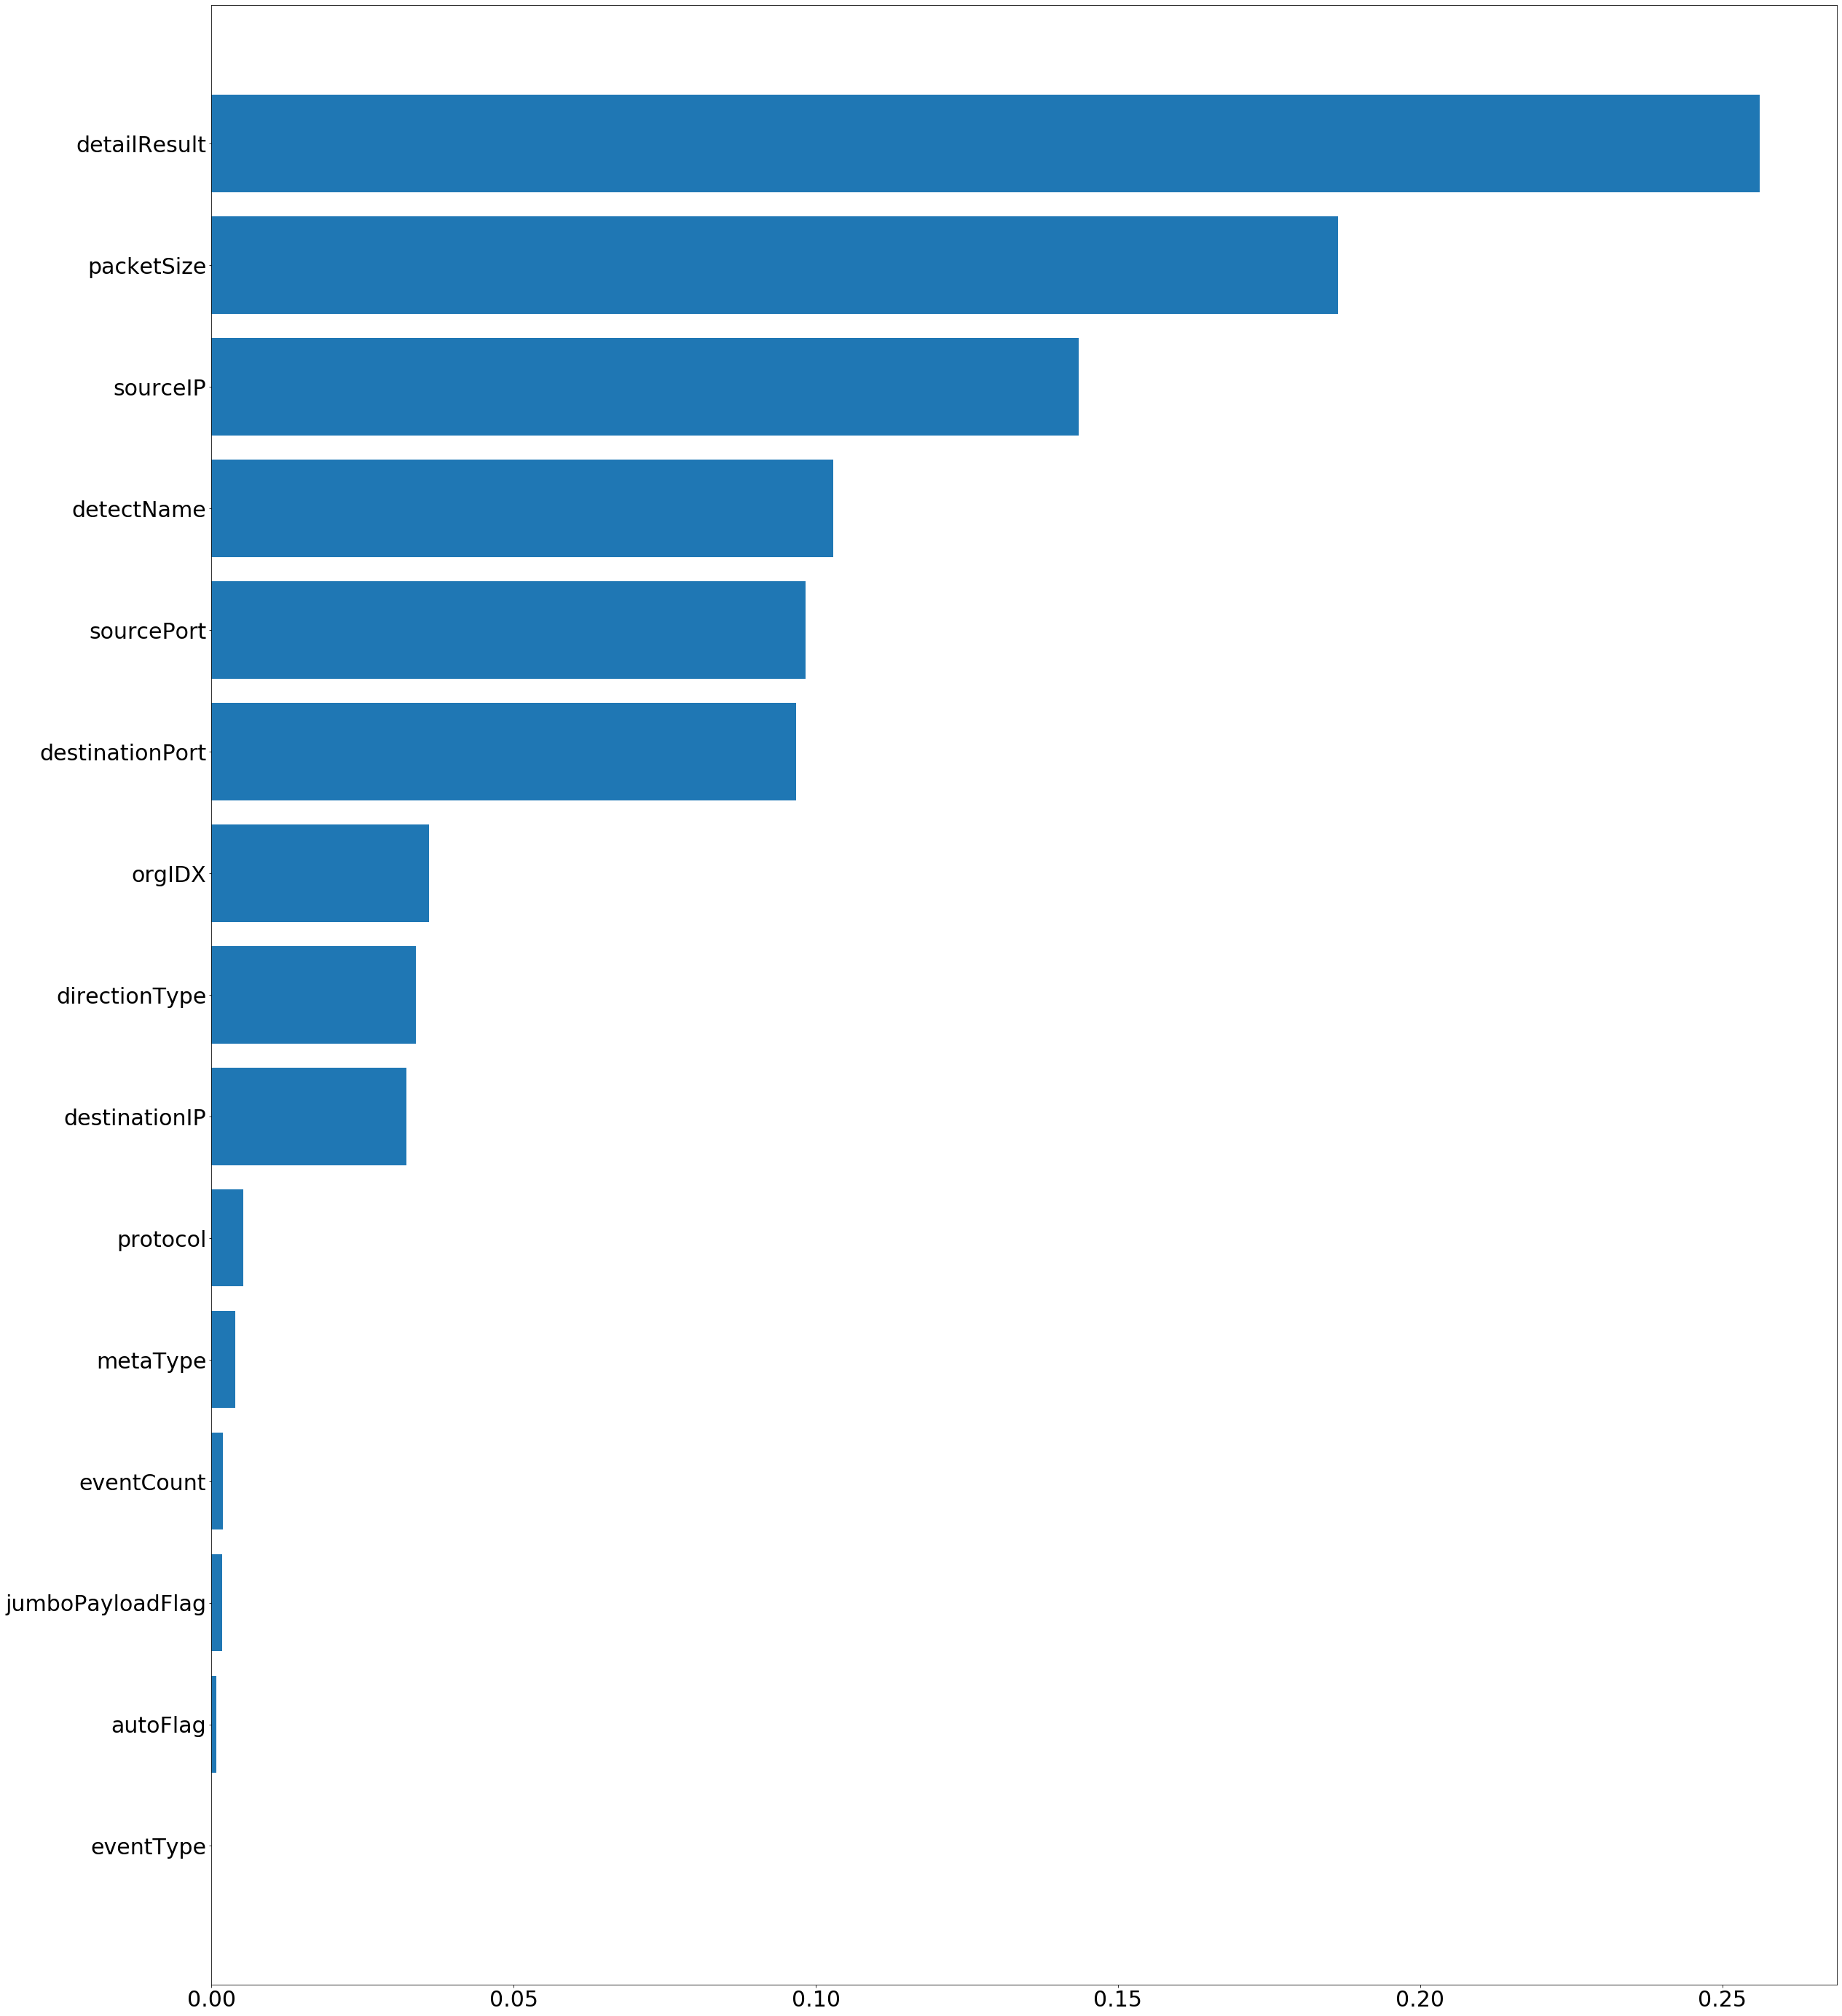

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 50))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.barh(imp_cols, imp_imp)
plt.savefig(r'E:\exp_data\old_data_rf_feature15\old_data_rf_feature_15_featureimportnace.png')
plt.show()